In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('ETH15M.csv', parse_dates=['dateTime'], index_col='dateTime')
data.dropna(inplace=True)

In [4]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

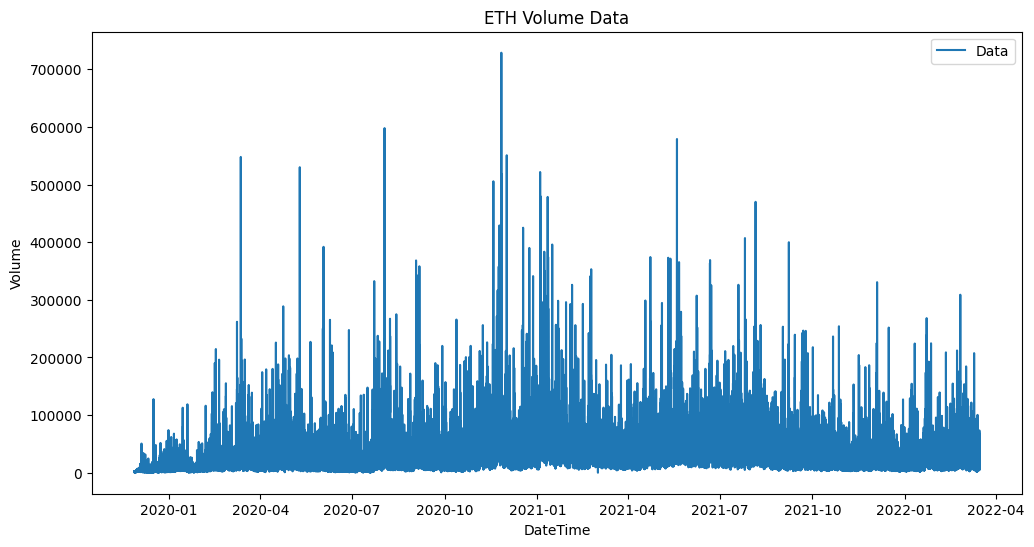

In [5]:
# Visualize the Volume data
plt.figure(figsize=(12, 6))
plt.plot(data['volume'], label='Data')
plt.xlabel('DateTime')
plt.ylabel('Volume')
plt.legend()
plt.title('ETH Volume Data')
plt.show()

In [7]:
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

y_train = train_data['volume']
y_test = test_data['volume']

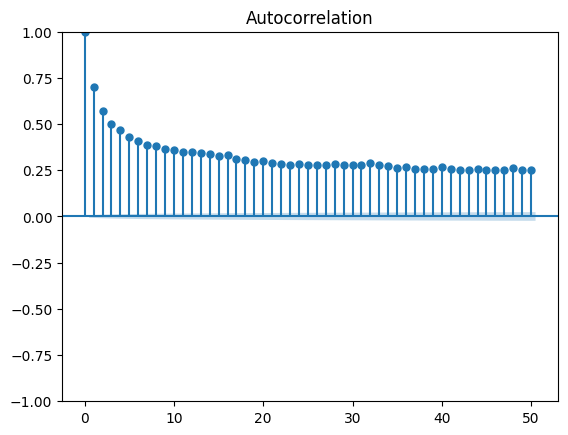

In [8]:
series = data['volume']
plot_acf(series, lags=50)
plt.show()


In [9]:
# AutoRegressive Model (AR) - Fitting and Prediction
lag_order = 1  # Adjust based on ACF insights
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [10]:
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [11]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
variance = np.var(y_test)

In [12]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Variance (testing): {variance:.2f}')

Mean Absolute Error (MAE): 15897.12
Root Mean Squared Error (RMSE): 21119.19
Variance (testing): 394806822.81


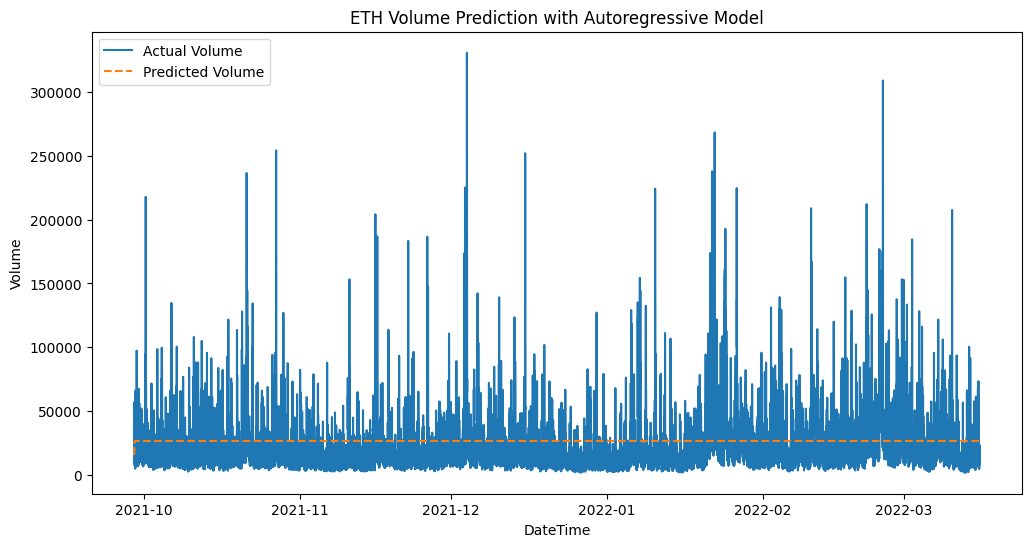

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Volume')
plt.plot(test_data.index, y_pred, label='Predicted Volume', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Volume')
plt.legend()
plt.title('ETH Volume Prediction with Autoregressive Model')
plt.show()